In [1]:
import math 
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as Func
import torch.optim as optim

%matplotlib inline

In [31]:
nb_of_points=15
x=np.empty([nb_of_points,1])
for index,i in enumerate(np.linspace(0,2*math.pi,nb_of_points)):
    x[index]=i


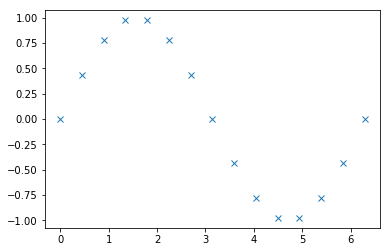

In [32]:
y=np.sin(x)
plt.plot(x,y,'x')

In [33]:

x_tensor=torch.from_numpy(x).type(torch.FloatTensor)
y_tensor=torch.from_numpy(y).type(torch.FloatTensor)

# Convert to pytorch variables
x_variable=Variable(x_tensor,requires_grad=False)
y_variable=Variable(y_tensor,requires_grad=False)


In [34]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
       # self.fc2 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc3 = torch.nn.Linear(n_hidden, n_hidden)   # hidden layer
        self.fc4 = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = Func.tanh(self.fc1(x))      # activation function for hidden layer
      #  x = Func.relu(self.fc2(x))
        x = Func.tanh(self.fc3(x))

        x = self.fc4(x)

        return x
        

In [35]:
# Set hyperparameters #
net = Net(n_feature=1, n_hidden=3, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.01,momentum=0.9)
loss_func = torch.nn.MSELoss()  





Net(
  (fc1): Linear(in_features=1, out_features=3)
  (fc3): Linear(in_features=3, out_features=3)
  (fc4): Linear(in_features=3, out_features=1)
)


In [36]:
# Train the network #
for t in range(2900):
    out = net(x_variable)                 # input x and predict based on x
    loss = loss_func(out, y_variable)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    print(t,loss.data[0])
    optimizer.step()        # apply gradients


0 0.4909021556377411
1 0.49069368839263916
2 0.4903011918067932
3 0.4897499978542328
4 0.4890647530555725
5 0.4882691502571106
6 0.487385094165802
7 0.4864325523376465
8 0.4854294955730438
9 0.48439154028892517
10 0.4833323359489441
11 0.4822636544704437
12 0.48119524121284485
13 0.4801352620124817
14 0.4790903329849243
15 0.47806599736213684
16 0.4770660400390625
17 0.47609373927116394
18 0.4751508831977844
19 0.4742387533187866
20 0.47335782647132874
21 0.47250789403915405
22 0.4716884195804596
23 0.470898300409317
24 0.4701365828514099
25 0.469401478767395
26 0.4686916470527649
27 0.4680054485797882
28 0.4673410654067993
29 0.4666968882083893
30 0.46607112884521484
31 0.46546193957328796
32 0.46486780047416687
33 0.46428683400154114
34 0.4637174606323242
35 0.4631580114364624
36 0.4626067876815796
37 0.46206235885620117
38 0.46152302622795105
39 0.46098753809928894
40 0.4604543447494507
41 0.4599221646785736
42 0.4593895673751831
43 0.4588552713394165
44 0.45831793546676636
45 0.457

In [37]:
nb_test_points=154
x_test=np.empty([nb_test_points,1])
for index,i in enumerate(np.linspace(0,2*math.pi,nb_test_points)):
    x_test[index]=i
x_test_tensor=torch.from_numpy(x_test).type(torch.FloatTensor)
x_test_variable=Variable(x_test_tensor,requires_grad=False)
predict=net(x_test_variable)

In [38]:
y_test=predict.data.numpy()

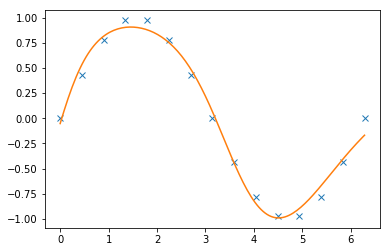

In [39]:
plt.plot(x,y,'x',x_test,y_test)